In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sktime.clustering.k_means import TimeSeriesKMeans
from torch.utils.data import DataLoader

from datasets import cluster_dataset
from models import AttentionHead, MultiAttentionHead

from matplotlib.cm import get_cmap
from matplotlib import pyplot as plt 

name = "tab10"
cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list

SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

device = torch.device("cpu")
torch.manual_seed(1)
import warnings
warnings.filterwarnings("ignore")

c:\Users\mbittner\Anaconda3\envs\xai_ma\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Grouping paths - Long-term patterns

In [2]:
# Load Dataset
dataset = 'heart'
X_array = np.load("./dataset/synthetic_data.npy")
print('dataset shape:', X_array.shape)

dataset shape: (1602, 2, 100)


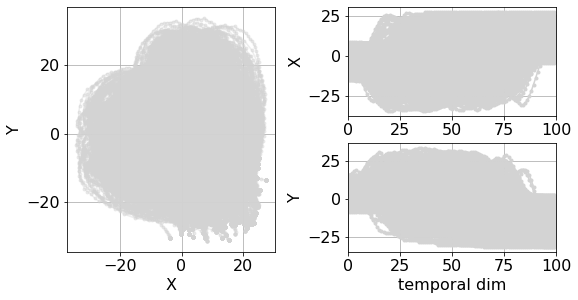

In [21]:
# Plot all paths with temporal information
fig, axs = plt.subplots(2 , 2, figsize = (8,4))
gs = axs[0, 1].get_gridspec()
# remove the underlying axes
for ax in axs[0:, 0]:
    ax.remove()
axbig = fig.add_subplot(gs[0:, 0])
#axbig.annotate('Big Axes \nGridSpec[1:, -1]', (0.1, 0.5),
 #              xycoords='axes fraction', va='center')
for i in range(X_array.shape[0]):
    axbig.plot(X_array[i,0,:], X_array[i,1,:], label=f'sample {i}',  marker='.', alpha = 0.4, color = 'lightgray')
    axs[0,1].plot(np.arange(0, X_array.shape[-1],1), X_array[i,0,:], marker='.', color = 'lightgray')
    axs[1,1].plot(np.arange(0,X_array.shape[-1],1), X_array[i,1,:], marker='.', color = 'lightgray')
axbig.set_xlabel('X')
axbig.set_ylabel('Y')
axbig.grid()
#axbig.legend()

#axs[0,1].set_xlabel('temporal dim')
axs[0,1].set_ylabel('X')
axs[0,1].grid()
axs[0,1].set_xlim([0,100])

#axs[0,1].set_xlabel('temporal dim')
axs[1,1].set_ylabel('Y')
axs[1,1].grid()
axs[1,1].set_xlabel('temporal dim')
axs[1,1].set_xlim([0,100])

# set the spacing between subplots
plt.subplots_adjust(left=0.05,
                    bottom=0.05, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.35, 
                    hspace=0.25)

plt.savefig(f"./figures/{dataset}_all_projections_with_temproal_info.jpg", bbox_inches="tight")


In [4]:
# Perform clustering
n_cluster = 2 # Specifiy the number of clusters
k_means = TimeSeriesKMeans(n_clusters=n_cluster, init_algorithm="forgy", metric="dtw") 
cluster_labels = k_means.fit_predict(X_array)
cluster_c = k_means.cluster_centers_

In [5]:
# Save dataset with cluster labels
for i in range(X_array.shape[0]):
    df_new = pd.DataFrame(columns=['vector', 'x', 'y', 'cluster_label'])
    df_new['x'] = X_array[i,0, :]
    df_new['y'] = X_array[i,1, :]
    df_new['vector'] = i
    df_new['cluster_label'] = cluster_labels[i]

    if i == 0:
        df = df_new
    else:
        df = pd.concat([df, df_new], axis = 0)
df.to_csv('./dataset/synthetic_dataset_with_cluster_labels.csv')

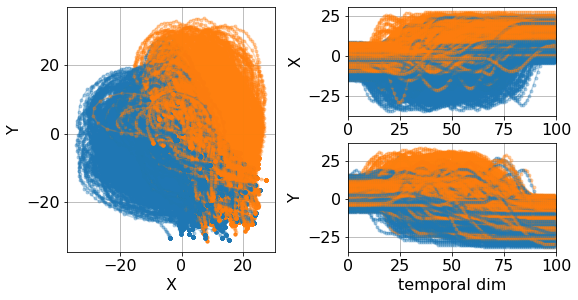

In [6]:
# Plot all paths with temproal information
fig, axs = plt.subplots(2 , 2, figsize = (8,4))
gs = axs[0, 1].get_gridspec()
# remove the underlying axes
for ax in axs[0:, 0]:
    ax.remove()
axbig = fig.add_subplot(gs[0:, 0])
#axbig.annotate('Big Axes \nGridSpec[1:, -1]', (0.1, 0.5),
 #              xycoords='axes fraction', va='center')
for i in range(X_array.shape[0]):
    axbig.plot(X_array[i,0,:], X_array[i,1,:], label=f'sample {i}',  marker='.', alpha = 0.3, color = colors[cluster_labels[i]])
    axs[0,1].plot(np.arange(0, X_array.shape[-1],1), X_array[i,0,:], marker='.',alpha = 0.3, color = colors[cluster_labels[i]])
    axs[1,1].plot(np.arange(0,X_array.shape[-1],1), X_array[i,1,:], marker='.', alpha = 0.3, color = colors[cluster_labels[i]])
axbig.set_xlabel('X')
axbig.set_ylabel('Y')
axbig.grid()
#axbig.legend()

#axs[0,1].set_xlabel('temporal dim')
axs[0,1].set_ylabel('X')
axs[0,1].grid()
axs[0,1].set_xlim([0,100])

#axs[0,1].set_xlabel('temporal dim')
axs[1,1].set_ylabel('Y')
axs[1,1].grid()
axs[1,1].set_xlabel('temporal dim')
axs[1,1].set_xlim([0,100])

# set the spacing between subplots
plt.subplots_adjust(left=0.05,
                    bottom=0.05, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.35, 
                    hspace=0.25)

plt.savefig(f"./figures/{dataset}_all_projections_all_labels_and_temporal_info.jpg", bbox_inches="tight")

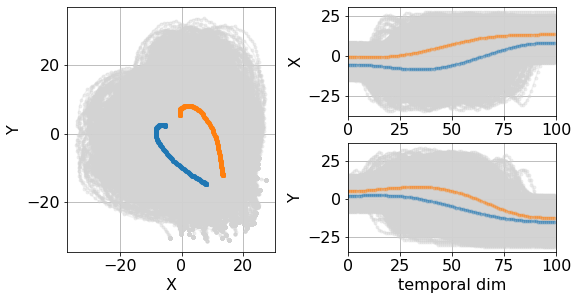

In [7]:
# Plot all paths with temproal information
fig, axs = plt.subplots(2 , 2, figsize = (8,4))
gs = axs[0, 1].get_gridspec()
# remove the underlying axes
for ax in axs[0:, 0]:
    ax.remove()
axbig = fig.add_subplot(gs[0:, 0])
#axbig.annotate('Big Axes \nGridSpec[1:, -1]', (0.1, 0.5),
 #              xycoords='axes fraction', va='center')
for i in range(X_array.shape[0]):
    axbig.plot(X_array[i,0,:], X_array[i,1,:], label=f'sample {i}',  marker='.', alpha = 0.3, color = 'lightgray')
    axs[0,1].plot(np.arange(0, X_array.shape[-1],1), X_array[i,0,:], marker='.',alpha = 0.3, color = 'lightgray')
    axs[1,1].plot(np.arange(0,X_array.shape[-1],1), X_array[i,1,:], marker='.', alpha = 0.3, color = 'lightgray')

for k in range(cluster_c.shape[0]):
    axbig.plot(cluster_c[k,0,:], cluster_c[k,1,:], label=f'cluster center {k}',  marker='.', color = colors[k], linewidth=2.8, markersize=8)
    axs[0,1].plot(np.arange(0, X_array.shape[-1],1), cluster_c[k,0,:], marker='.',alpha = 0.3, color = colors[k])
    axs[1,1].plot(np.arange(0,X_array.shape[-1],1), cluster_c[k,1,:], marker='.', alpha = 0.3, color = colors[k])
axbig.set_xlabel('X')
axbig.set_ylabel('Y')
axbig.grid()
#axbig.legend()

#axs[0,1].set_xlabel('temporal dim')
axs[0,1].set_ylabel('X')
axs[0,1].grid()
axs[0,1].set_xlim([0,100])

#axs[0,1].set_xlabel('temporal dim')
axs[1,1].set_ylabel('Y')
axs[1,1].grid()
axs[1,1].set_xlabel('temporal dim')
axs[1,1].set_xlim([0,100])

# set the spacing between subplots
plt.subplots_adjust(left=0.05,
                    bottom=0.05, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.35, 
                    hspace=0.25)

plt.savefig(f"./figures/{dataset}_all_projections_cluster_centroids_and_temproal_info.jpg", bbox_inches="tight")

### Highlighting Patterns in Projections – Short-term Patterns

In [8]:
# Define the Model used for Training the Classifier
input_dim1 = 2
hidden_dim_per_head=2
input_dim2 = 3
seq_length = X_array.shape[2]
num_classes = n_cluster

model = torch.nn.Sequential(
        MultiAttentionHead(input_dim = input_dim1,  hidden_dim_per_head=hidden_dim_per_head, convolution_kernels = [3,9, 15]),
        nn.Flatten(),
        nn.Linear(input_dim2*hidden_dim_per_head*seq_length, num_classes)
)
model = model.to(device)

In [9]:
# Load Datasets and Create Dataloader
dataset_cluster = cluster_dataset(X_array, cluster_labels)
train_dataloader = DataLoader(dataset_cluster, batch_size=10, shuffle=True)

Epoch: 0 Loss: 0.34 Accuaracy: 0.84
Epoch: 1 Loss: 0.20 Accuaracy: 0.92
Epoch: 2 Loss: 0.17 Accuaracy: 0.93
Epoch: 3 Loss: 0.15 Accuaracy: 0.93
Epoch: 4 Loss: 0.14 Accuaracy: 0.94
Epoch: 5 Loss: 0.12 Accuaracy: 0.95
Epoch: 6 Loss: 0.11 Accuaracy: 0.96
Epoch: 7 Loss: 0.10 Accuaracy: 0.96
Epoch: 8 Loss: 0.10 Accuaracy: 0.96
Epoch: 9 Loss: 0.09 Accuaracy: 0.96


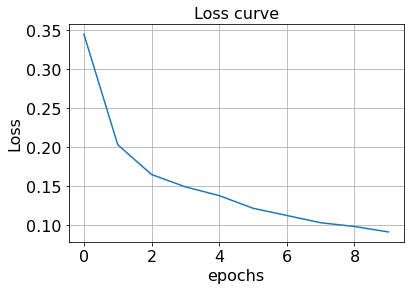

In [10]:
# Train the Network for 10 epochs
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()
epochs = 10 #

loss_list = []
acc_list = []
for epoch in range(epochs):
        model.train()
        #print('new_epoch')
        loss_list_batch = []
        acc_list_batch = []
        for i, data in enumerate(train_dataloader):
                input, labels = data
                #print(input.shape)
                input = input.to(device)
                labels = labels.to(device)
                #print(input.shape)
                output = model(input)
                acc = (output.argmax(dim=1) == labels).sum()/len(labels)
                #print(output.shape)
                loss = loss_func(output, labels)
                #loss = compute_similarity_loss(output, input, beta_similar_ones=4)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
                loss_list_batch.append(loss.item())
                acc_list_batch.append(acc)
                #print('Loss %0.2f' % (loss.item()))
        mean_batch_loss = sum(loss_list_batch)/len(loss_list_batch)
        mean_batch_acc = sum(acc_list_batch)/len(acc_list_batch)
        loss_list.append(mean_batch_loss)
        acc_list.append(mean_batch_acc)
        print('Epoch: %d Loss: %.2f Accuaracy: %.2f' % (epoch, mean_batch_loss, mean_batch_acc))
torch.save(model, f"./model_history/model_epoch_{epoch}.pt")
        

plt.title("Loss curve") 
plt.xlabel("epochs") 
plt.ylabel("Loss") 
plt.plot(loss_list) 
plt.grid()
plt.show() 

In [17]:
# Run network with cluster centroids, in oder to get attention matrixes for the centroids
input = torch.Tensor(cluster_c).to(device)
model = torch.load('model_history/model_epoch_9.pt') # Load already trained model
model.eval()
_ = model(input)
print('Shape of attention Matrix', model[0].heads[2].attention_matrix.shape)

Shape of attention Matrix torch.Size([2, 100, 100])


In [18]:
def attention_heatmap2d(model, ts, show = True):
    num_heads = len(model[0].heads)
    ts = ts.detach().numpy()
    print(ts.shape)
    ts_x = np.arange(0,ts.shape[-1])
    
    fig, ax = plt.subplots(ts.shape[0] ,num_heads+1, figsize = (4*5.5,2*5.5))
    for k in range(ts.shape[0]):
        ax[k, 0].plot(ts_x, ts[k,0,:], color = colors[k], linestyle= '-.',alpha = 0.8, label = f'x - long-term pattern {k+1}', linewidth = 2.5)
        ax[k, 0].plot(ts_x, ts[k,1,:], color = colors[k], alpha = 0.8, label = f'x - long-term pattern {k+1}', linewidth = 2.5)
        ax[k, 0].set_xlim([ts_x[0], ts_x[-1]])
        ax[k, 0].set_ylim([-20, 20])
        ax[k, 0].set_xlabel(f'temporal dim')
        ax[k, 0].grid()
        ax[k, 0].legend()

        for i in range(num_heads):
            attention_matrix = model[0].heads[i].attention_matrix.detach().numpy()[k,:,:]
            ax[k, i+1].imshow(attention_matrix , cmap='hot', interpolation='nearest')
            ax[k, i+1].set_xlabel('input')
            ax[k, i+1].set_ylabel('output')
            ax[0, i+1].set_title(f'attention matrix head {i}')

    if show:
        plt.savefig(f"./figures/{dataset}_attention_matrix.jpg", bbox_inches="tight")
        plt.show()


def attention_heatmap2d_single(model, ts, pattern_idx , show = True):
    num_heads = len(model[0].heads)
    ts = ts.detach().numpy()
    #print(ts.shape)
    ts_x = np.arange(0,ts.shape[-1])
    
    fig, ax = plt.subplots(ts.shape[0] ,num_heads+1, figsize = (4*5.2,1*4.5))
    #ax[0,i].scatter(ts_x, ts,  marker='.', color = 'black', alpha = 0.8)
    for k in range(ts.shape[0]):
        ax[0].plot(ts_x, ts[k,0,:], color = colors[pattern_idx], linestyle= '-.',alpha = 0.8, label = f'x - long-term pattern {pattern_idx+1}', linewidth = 2.5)
        ax[0].plot(ts_x, ts[k,1,:], color = colors[pattern_idx], alpha = 0.8, label = f'y - long-term pattern {pattern_idx+1}', linewidth = 2.5)
        ax[0].set_xlim([ts_x[0], ts_x[-1]])
        ax[0].set_ylim([-20, 20])
        #ax[k, 0].set_ylabel(f'cluster centroid {k+1}')
        ax[0].set_xlabel(f'temporal dim')

        ax[0].grid()
        ax[0].legend()

        for i in range(num_heads):
            attention_matrix = model[0].heads[i].attention_matrix.detach().numpy()[pattern_idx,:,:]
            ax[i+1].imshow(attention_matrix , cmap='hot', interpolation='nearest')
            ax[i+1].set_xlabel('input')
            ax[i+1].set_ylabel('output')
            ax[i+1].set_title(f'attention matrix head {i+1}')

    if show:
        plt.savefig(f"figures/{dataset}_attention_matrix_cluster_{pattern_idx}.jpg", bbox_inches="tight")
        plt.show()


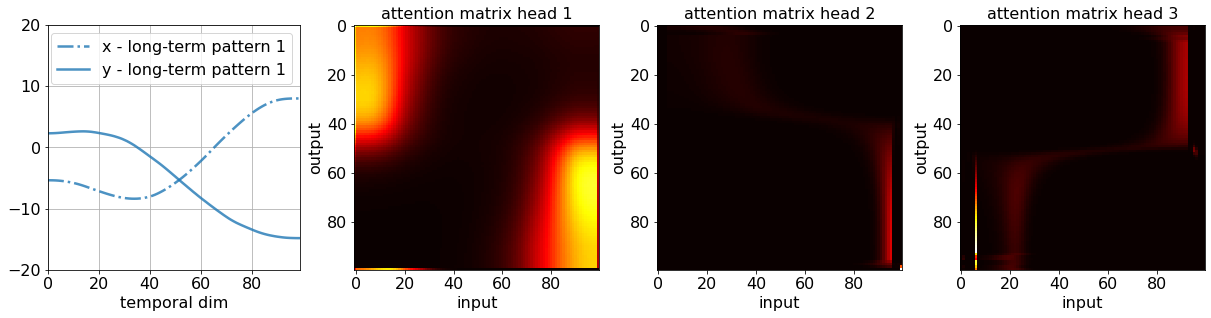

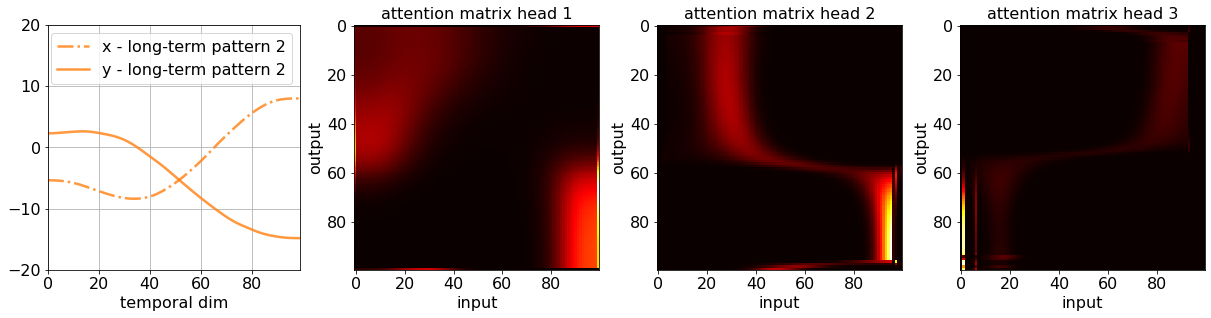

In [19]:
# Plot the attention heads for each cluster centroid (center 0 and center 1)
attention_heatmap2d_single(model, input[0:1], pattern_idx = 0)
attention_heatmap2d_single(model, input[0:1], pattern_idx = 1)

In [20]:
for index in range(n_cluster):
    X = model[0].heads[0].attention_embedding.detach().numpy()[index,:,:]
    Y = model[0].heads[1].attention_embedding.detach().numpy()[index,:,:]
    Z = model[0].heads[2].attention_embedding.detach().numpy()[index,:,:]
    data_concat = np.concatenate((X, Y, Z) , axis = 1)
    number_clusters = 2
    KMean = KMeans(n_clusters=number_clusters, random_state=1)
    labels_reduced_embedded =  KMean.fit_predict(data_concat)
    color_list = [colors[label] for label in labels_reduced_embedded]
    fig, ax = plt.subplots(1,2, figsize= (18,8))

    ax[0].plot(X[:,0], label = 'head1-1', linestyle = '-.', color = 'tan', linewidth = 2.5) 
    ax[0].plot(X[:,1], label = 'head1-2', linestyle = '--', color = 'tan', linewidth = 2.5)
    ax[0].plot(Y[:,0], label = 'head2-1', linestyle = '-.', color = 'black', linewidth = 2.5) 
    ax[0].plot(Y[:,1], label = 'head2-2', linestyle = '--', color = 'black', linewidth = 2.5) 
    ax[0].plot(Z[:,0], label = 'head3-1', linestyle = '-.', color = 'steelblue',linewidth = 2.5) 
    ax[0].plot(Z[:,1], label = 'head3-2', linestyle = '--', color = 'steelblue', linewidth = 2.5)
    ax[0].set_xlabel('temporal dimension')
    ax[0].set_ylabel('attention score')

    ax[0].set_ylim([-20, 10])
    ax[0].set_xlim([0,data_concat.shape[0]-1])
    ax[0].legend(ncol=3, loc='upper left', bbox_to_anchor=(0., 0.999))
 
    for i in range(X_array.shape[0]):
        ax[1].plot(X_array[i,0,:], X_array[i,1,:], marker='.', alpha = 0.6, color = 'lightgray', zorder= 1)
    
    for label in range(number_clusters):
        idx = labels_reduced_embedded == label
        ax[1].scatter(input[index,0,idx], input[index,1,idx], alpha = 1, color = colors[label], zorder = 2, label=f'short-term cluster {label+1}')
    
    ax[1].plot(input[index,0,:], input[index,1,:], color = 'black')
    ax[1].set_xlabel('X')
    ax[1].set_ylabel('Y')
    ax[1].legend()
    ax[0].grid()
    ax[1].grid()
    plt.savefig(f"./figures/{dataset}_short_term_patterns_cluster_{index+1}.jpg", bbox_inches="tight")
    plt.close()
    

c:\Users\mbittner\Anaconda3\envs\xai_ma\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\mbittner\Anaconda3\envs\xai_ma\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


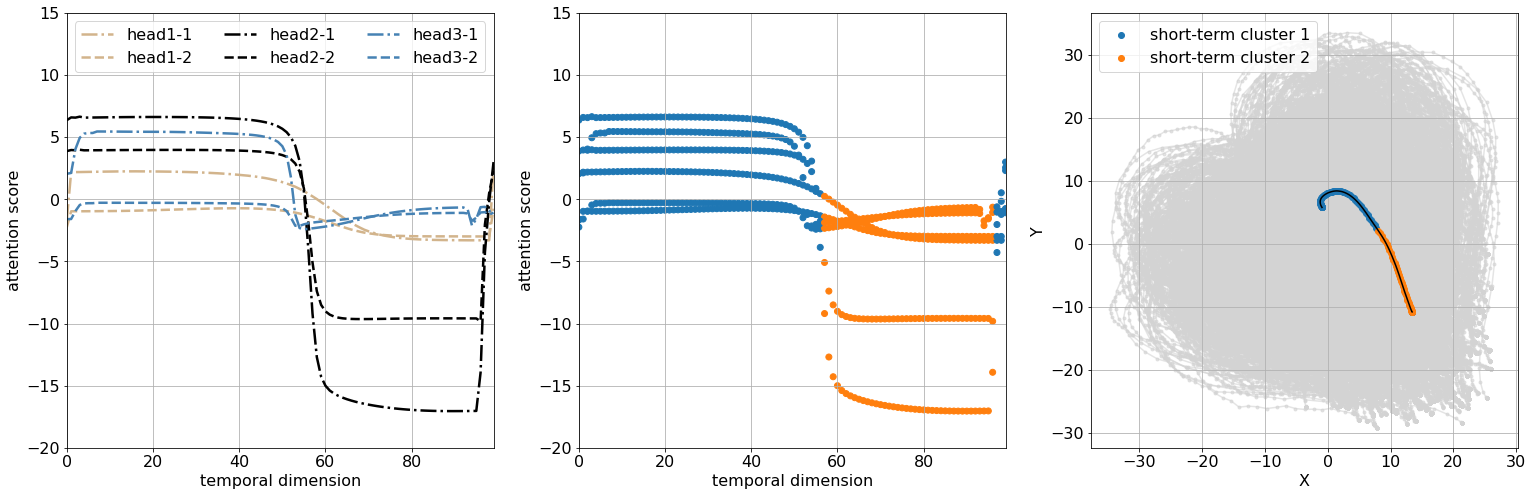

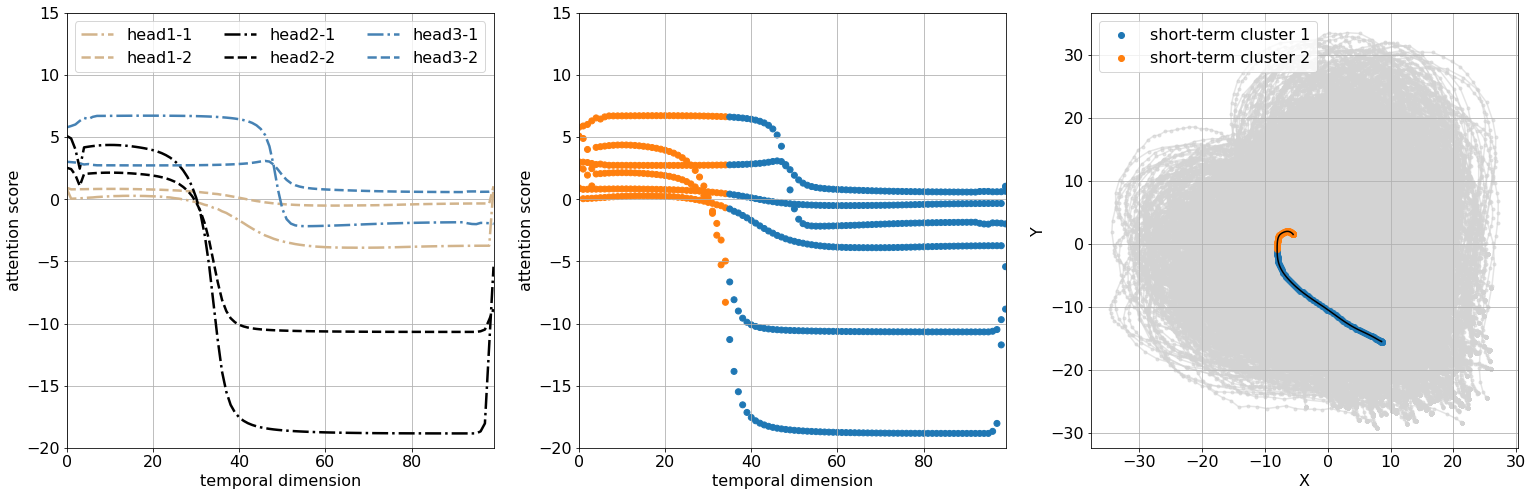

In [ ]:
for index in range(n_cluster):
    X = model[0].heads[0].attention_embedding.detach().numpy()[index,:,:]
    Y = model[0].heads[1].attention_embedding.detach().numpy()[index,:,:]
    Z = model[0].heads[2].attention_embedding.detach().numpy()[index,:,:]
    #data_concat = np.concatenate((np.expand_dims(X,axis = 1), np.expand_dims(Y,axis = 1),np.expand_dims(Z,axis = 1)), axis = 1)
    data_concat = np.concatenate((X, Y, Z) , axis = 1)
    
    #data_concat = np.concatenate((X[:,0:1], Y[:,0:1], Z[:,0:1]) , axis = 1)

    #data_concat = np.expand_dims(X,axis = 1)
    #print(input.shape)
    number_clusters = 2
    KMean = KMeans(n_clusters=number_clusters, random_state=1)
    #labels_embedded = KMean.fit_predict(embeddings)
    labels_reduced_embedded =  KMean.fit_predict(data_concat)
    #labels_reduced_embedded =  KMean.fit_predict(input.detach().numpy()[index,:,:].T)

    #print(labels_reduced_embedded.shape)

    color_list = [colors[label] for label in labels_reduced_embedded]

    fig, ax = plt.subplots(1, 3, figsize= (8*3+2,8))
    #for i in range(X.shape[-1])
    ax[0].plot(X[:,0], label = 'head1-1', linestyle = '-.', color = 'tan', linewidth = 2.5) # green
    ax[0].plot(X[:,1], label = 'head1-2', linestyle = '--', color = 'tan', linewidth = 2.5) # green
    ax[0].plot(Y[:,0], label = 'head2-1', linestyle = '-.', color = 'black', linewidth = 2.5) #black
    ax[0].plot(Y[:,1], label = 'head2-2', linestyle = '--', color = 'black', linewidth = 2.5) #black
    ax[0].plot(Z[:,0], label = 'head3-1', linestyle = '-.', color = 'steelblue',linewidth = 2.5) # darkviolet
    ax[0].plot(Z[:,1], label = 'head3-2', linestyle = '--', color = 'steelblue', linewidth = 2.5) # darkviolet

    y_tmp = np.arange(0, X[:,0].shape[0], 1)
    
    ax[1].scatter(y_tmp, X[:,0],color = color_list)
    ax[1].scatter(y_tmp, X[:,1],color = color_list)
    ax[1].scatter(y_tmp, Y[:,0],color = color_list)
    ax[1].scatter(y_tmp, Y[:,1],color = color_list)
    ax[1].scatter(y_tmp, Z[:,0],color = color_list)
    ax[1].scatter(y_tmp, Z[:,1],color = color_list)

    #ax[2].scatter(X[:,0], X[:,1], label = 'head1', color = 'tan')
    #ax[2].scatter(Y[:,0], Y[:,1], label = 'head2', color = 'black')
    #ax[2].scatter(Z[:,0], Z[:,1], label = 'head2', color = 'steelblue')
    #ax[0].plot(Y,  label = 'Attention head 1')
    #ax[0].plot(Z, label = 'Attention head 2')


    ax[0].set_xlabel('temporal dimension')
    ax[0].set_ylabel('attention score')

    ax[1].set_xlabel('temporal dimension')
    ax[1].set_ylabel('attention score')

    #ax[0].scatter(X, label = 'Attention head 0')
    #ax[0].plot(Y,  label = 'Attention head 1')
    #ax[0].plot(Z, label = 'Attention head 2')
    #ax[0].set_xlabel('sequence')
    #ax[0].set_ylim([-4, 4])
    #ax[0].set_ylim([-5, 6])
    ax[0].set_ylim([-20, 15])
    ax[0].set_xlim([0,data_concat.shape[0]-1])
    ax[0].legend(ncol=3, loc='upper left', bbox_to_anchor=(0., 0.999))


    ax[1].set_ylim([-20, 15])
    ax[1].set_xlim([0,data_concat.shape[0]-1])
    #ax[1].legend()
    #ax[1].scatter(Z, color = color_list)

    for i in range(X_array.shape[0]):
    # Using set_dashes() to modify dashing of an existing line
    #line1, = ax.plot(x, y, label='Using set_dashes()')
    #ax.plot(ts[i,0,:], ts[i,1,:], label=f'sample {i}',  marker='.')
        ax[2].plot(X_array[i,0,:], X_array[i,1,:], marker='.', alpha = 0.6, color = 'lightgray', zorder= 1)
    
    for label in range(number_clusters):
        idx = labels_reduced_embedded == label
        ax[2].scatter(input[index,0,idx], input[index,1,idx], alpha = 1, color = colors[label], zorder = 2, label=f'short-term cluster {label+1}')
    
    ax[2].plot(input[index,0,:], input[index,1,:], color = 'black')
    ax[2].set_xlabel('X')
    ax[2].set_ylabel('Y')
    ax[2].legend()

    ax[0].grid()
    ax[1].grid()
    ax[2].grid()
    
    plt.savefig(f"./figures/{dataset}_short_term_patterns_cluster_{index+1}_additional.jpg", bbox_inches="tight")

    